In [42]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.express as px

sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_table('~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv')

### Self-control stops¶
#### Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
#### Calculate median and mean prices for apartments for sell before cleaning the data.
#### Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
#### Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.
#### Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [3]:
spb_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.40,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068
1,5490504238903444021,2014-11-27T00:00:00+03:00,2016-04-28T00:00:00+03:00,7038880.0,2,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
2,5490504238903447743,2014-11-27T00:00:00+03:00,2016-05-11T00:00:00+03:00,7038880.0,3,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
3,5490504238877673946,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,12074400.0,5,False,3,False,93.60,10.90,52.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686
4,5490504238877648740,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,20406100.0,7,False,4,False,142.70,13.84,82.55,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686


In [ ]:
df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')
https://datatofish.com/if-condition-in-pandas-dataframe/

In [106]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_df = spb_df[spb_df.offer_type == 2].copy()
sell_df = spb_df[spb_df.offer_type == 1].copy()
sell_median_price = sell_df.last_price.median()
sell_mean_price = sell_df.last_price.mean()
print("Sell median price: {}".format(sell_median_price))
print("Sell mean price: {}".format(sell_mean_price))
print()
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

print()

# .max function returns the maximum value across all rows
max_price_sell = sell_df.last_price.max()
print("Max price in sell: {}".format(max_price_sell))
max_price_rent = rent_df.last_price.max()
print("Max price in rent: {}".format(max_price_rent))

Sell median price: 4599000.0
Sell mean price: 6969288.146034318

Rent median price: 25000.0
Rent mean price: 31719.256638977487

Max price in sell: 763000000.0
Max price in rent: 4900000.0


In [107]:
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()
sell_df_spb = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()
sell_median_price_spb = sell_df_spb.last_price.median()
sell_mean_price_spb = sell_df_spb.last_price.mean()
print("Sell median price: {}".format(sell_median_price_spb))
print("Sell mean price: {}".format(sell_mean_price_spb))
print()
rent_median_price_spb = rent_df_spb.last_price.median()
rent_mean_price_spb = rent_df_spb.last_price.mean()
print("Rent median price: {}".format(rent_median_price_spb))
print("Rent mean price: {}".format(rent_mean_price_spb))

print()

# .max function returns the maximum value across all rows
max_price_sell_spb = sell_df_spb.last_price.max()
print("Max price in sell: {}".format(max_price_sell_spb))
max_price_rent_spb = rent_df_spb.last_price.max()
print("Max price in rent: {}".format(max_price_rent_spb))

Sell median price: 5300000.0
Sell mean price: 8151204.698728967

Rent median price: 25000.0
Rent mean price: 33015.23299627052

Max price in sell: 763000000.0
Max price in rent: 4900000.0


In [108]:
# find what's median and mean price per square meter in rent
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))
print()

# find what's median and mean price per square meter in rent
median_price_per_sq_m_sell = sell_df.price_per_sq_m.median()
mean_price_per_sq_m_sell = sell_df.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(median_price_per_sq_m_sell))
print("Mean price per sq m in sell: {}".format(mean_price_per_sq_m_sell))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957

Median price per sq m in sell: 95214.28571428571
Mean price per sq m in sell: 102713.8800799551


In [109]:
# find what's median and mean price per square meter in rent
rent_df_spb['price_per_sq_m'] = rent_df.last_price/rent_df_spb.area
sell_df_spb['price_per_sq_m'] = sell_df.last_price/sell_df_spb.area
median_price_per_sq_m = rent_df_spb.price_per_sq_m.median()
mean_price_per_sq_m = rent_df_spb.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))
print()

# find what's median and mean price per square meter in rent
median_price_per_sq_m_sell = sell_df_spb.price_per_sq_m.median()
mean_price_per_sq_m_sell = sell_df_spb.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(median_price_per_sq_m_sell))
print("Mean price per sq m in sell: {}".format(mean_price_per_sq_m_sell))

Median price per sq m in rent: 555.5555555555555
Mean price per sq m in rent: 610.3850375822834

Median price per sq m in sell: 102285.71428571429
Mean price per sq m in sell: 113645.16934635033


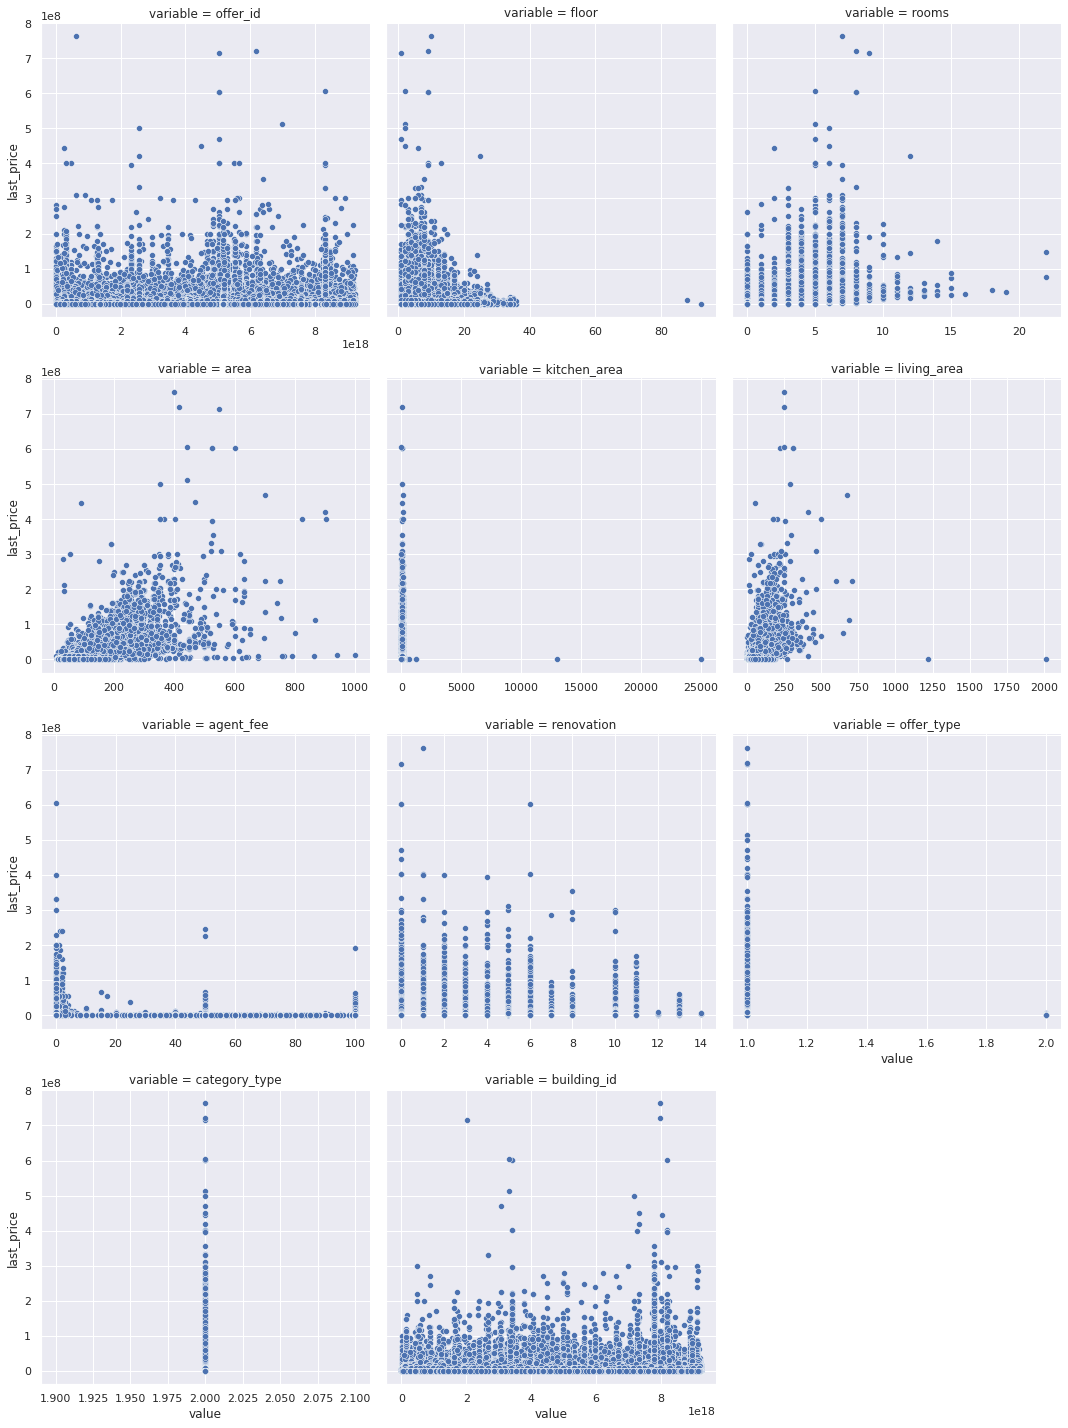

In [221]:
sns.relplot(data=spb_df.select_dtypes('number').melt(id_vars=['last_price']),            x='value', y='last_price', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)           )

## Cleaning Data

In [220]:
house_rent_df = rent_df_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
house_rent_df.head(1)
rent_df_spb = rent_df_spb.merge(house_rent_df)

In [111]:
rent_df_spb.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.560540e+05,1.560540e+05,156054.000000,156054.000000,156054.000000,118889.000000,123565.000000,123362.00000,103117.000000,156054.0,156054.0,1.560540e+05,156054.000000,156054.000000
mean,4.678682e+18,3.301523e+04,6.690434,1.606098,53.721801,11.656506,30.618863,71.93907,3.689285,2.0,2.0,4.567835e+18,610.385038,591.450076
std,2.636512e+18,4.271156e+04,4.973817,0.879859,24.856166,82.073251,17.764563,28.44072,4.486899,0.0,0.0,2.695468e+18,920.155765,246.583612
min,8.726400e+05,1.300000e+02,1.000000,0.000000,11.000000,2.000000,2.000000,0.00000,0.000000,2.0,2.0,4.585730e+14,1.203704,76.923077
25%,2.684536e+18,2.000000e+04,3.000000,1.000000,38.000000,8.000000,18.000000,50.00000,0.000000,2.0,2.0,2.153540e+18,469.387755,500.000000
50%,5.141797e+18,2.500000e+04,5.000000,1.000000,46.000000,10.000000,27.000000,75.00000,1.000000,2.0,2.0,4.697630e+18,555.555556,552.777778
75%,6.842588e+18,3.500000e+04,9.000000,2.000000,62.000000,12.000000,37.000000,100.00000,10.000000,2.0,2.0,6.837285e+18,675.675676,641.025641
max,9.223288e+18,4.900000e+06,92.000000,5.000000,200.000000,25000.000000,2015.000000,100.00000,11.000000,2.0,2.0,9.220297e+18,121428.571429,74509.803922


In [112]:
rent_df_spb.shape

(156054, 19)

<AxesSubplot:>

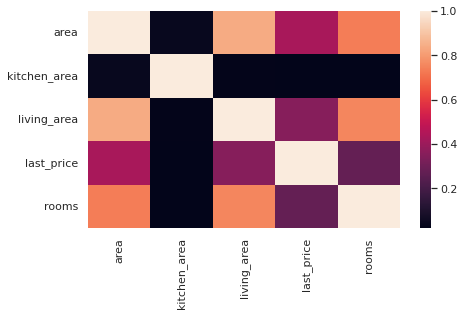

In [224]:
sns.heatmap(rent_df_spb[['area','kitchen_area','living_area','last_price','rooms']].corr())

<AxesSubplot:xlabel='price_per_sq_m'>

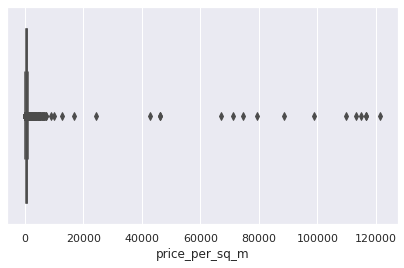

In [113]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(rent_df_spb['price_per_sq_m'])

<AxesSubplot:xlabel='house_price_sqm_median'>

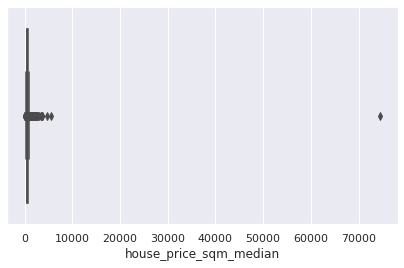

In [114]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(rent_df_spb['house_price_sqm_median'])

In [115]:
rent_df_cleaned = rent_df_spb[~((rent_df_spb.price_per_sq_m/rent_df_spb.house_price_sqm_median) > 5)]
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 250) 
                               & (rent_df_cleaned.house_price_sqm_median/rent_df_cleaned.price_per_sq_m >= 2))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 200) 
                                          & (rent_df_cleaned.price_per_sq_m == rent_df_cleaned.house_price_sqm_median))]

In [116]:
rent_df_cleaned.shape

(155890, 19)

<AxesSubplot:xlabel='price_per_sq_m'>

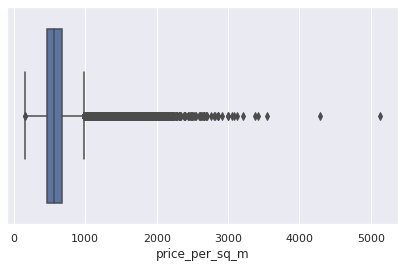

In [117]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(rent_df_cleaned['price_per_sq_m'])

<AxesSubplot:xlabel='house_price_sqm_median'>

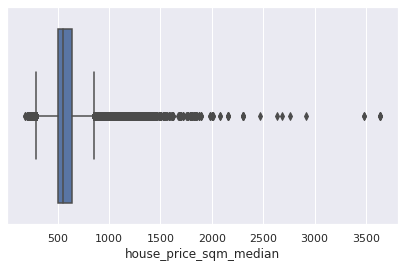

In [118]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(rent_df_cleaned['house_price_sqm_median'])

In [119]:
house_sell_df = sell_df_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
house_sell_df.head(1)
sell_df_spb = sell_df_spb.merge(house_sell_df)

In [120]:
sell_df_spb.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,13142.000000,142614.000000,197792.0,197792.0,1.977920e+05,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,19.687986,3.467640,1.0,2.0,4.604822e+18,1.136452e+05,1.115236e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,39.441258,3.944312,0.0,0.0,2.732627e+18,6.322742e+04,4.578424e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,0.000000,1.0,2.0,4.585730e+14,4.871795e+02,5.000000e+03
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,0.000000,1.0,2.0,2.179036e+18,8.714286e+04,8.885749e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,0.000000,2.000000,1.0,2.0,4.727029e+18,1.022857e+05,1.013889e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,1.000000,6.000000,1.0,2.0,6.919866e+18,1.230101e+05,1.203704e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,100.000000,14.000000,1.0,2.0,9.220297e+18,9.283388e+06,1.818182e+06


In [121]:
sell_df_spb.shape

(197792, 19)

In [122]:
sell_df_spb.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,13142.000000,142614.000000,197792.0,197792.0,1.977920e+05,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,19.687986,3.467640,1.0,2.0,4.604822e+18,1.136452e+05,1.115236e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,39.441258,3.944312,0.0,0.0,2.732627e+18,6.322742e+04,4.578424e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,0.000000,1.0,2.0,4.585730e+14,4.871795e+02,5.000000e+03
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,0.000000,1.0,2.0,2.179036e+18,8.714286e+04,8.885749e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,0.000000,2.000000,1.0,2.0,4.727029e+18,1.022857e+05,1.013889e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,1.000000,6.000000,1.0,2.0,6.919866e+18,1.230101e+05,1.203704e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,100.000000,14.000000,1.0,2.0,9.220297e+18,9.283388e+06,1.818182e+06


<AxesSubplot:xlabel='price_per_sq_m'>

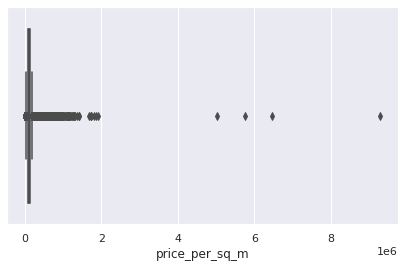

In [123]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(sell_df_spb['price_per_sq_m'])

<AxesSubplot:xlabel='house_price_sqm_median'>

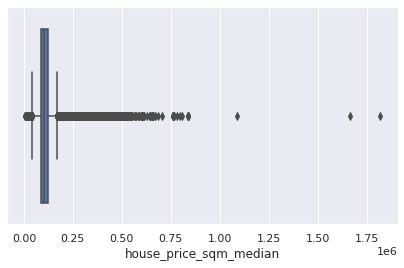

In [124]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(sell_df_spb['house_price_sqm_median'])

In [125]:
(sell_df_spb.isna().sum() / len(sell_df_spb)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
offer_id,0.00%
first_day_exposition,0.00%
last_day_exposition,0.00%
last_price,0.00%
floor,0.00%
open_plan,0.00%
rooms,0.00%
studio,0.00%
area,0.00%
kitchen_area,14.66%


In [126]:
sell_df_spb[sell_df_spb.rooms == 0].shape

(10851, 19)

In [127]:
sell_df_spb[sell_df_spb.rooms == 0].head(1)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
38,5316960542907715100,2015-04-16T00:00:00+03:00,2016-07-19T00:00:00+03:00,3750000.0,17,True,0,False,29.0,NaN,22.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,129310.344828,124074.074074


<AxesSubplot:>

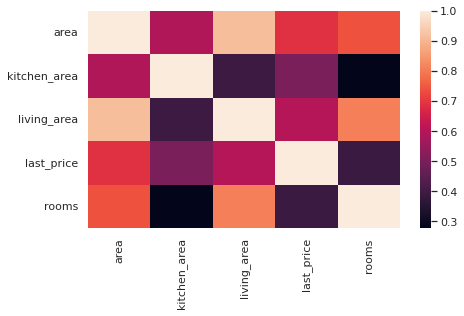

In [223]:
sns.heatmap(sell_df_spb[['area','kitchen_area','living_area','last_price','rooms']].corr())

In [128]:
sell_df_cleaned['area'].quantile(0.999)

284.0

In [130]:
sell_df_cleaned = sell_df_spb[~((sell_df_spb.price_per_sq_m/sell_df_spb.house_price_sqm_median) > 5)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['last_price'] < 100000000) & (sell_df_cleaned['last_price'] > 2000000)]
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 500000) 
                                     & ((sell_df_cleaned.house_price_sqm_median < 200000) 
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 38000) 
                               & (sell_df_cleaned.house_price_sqm_median/sell_df_cleaned.price_per_sq_m >= 2))]
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 30000) 
                                          & (sell_df_cleaned.price_per_sq_m == sell_df_cleaned.house_price_sqm_median))]

#New
sell_df_cleaned = sell_df_cleaned.fillna(sell_df_cleaned.median())
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['floor'] <= 26)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['living_area'] < 212)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['kitchen_area'] < 67)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['area'] < 342)]

In [131]:
sell_df_cleaned.shape

(194440, 19)

In [132]:
sell_df_cleaned.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.944400e+05,1.944400e+05,194440.000000,194440.000000,194440.000000,194440.000000,194440.000000,194440.000000,194440.000000,194440.0,194440.0,1.944400e+05,1.944400e+05,194440.000000
mean,4.937440e+18,7.613438e+06,6.734947,2.023185,63.568844,11.540668,35.229454,1.328293,3.057267,1.0,2.0,4.602270e+18,1.120963e+05,110686.430893
std,2.743211e+18,7.808201e+06,5.342533,1.126249,34.855041,5.930880,20.663154,11.374779,3.414423,0.0,0.0,2.734091e+18,4.595812e+04,41519.269220
min,7.797270e+05,2.000700e+06,1.000000,0.000000,10.000000,1.040000,1.640000,0.000000,0.000000,1.0,2.0,4.585730e+14,3.027273e+04,30272.727273
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.700000,8.100000,19.800000,0.000000,0.000000,1.0,2.0,2.178893e+18,8.728180e+04,88939.393939
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,0.000000,2.000000,1.0,2.0,4.727029e+18,1.022835e+05,101428.424874
75%,7.303687e+18,8.171194e+06,9.000000,3.000000,76.000000,13.000000,42.800000,0.000000,3.000000,1.0,2.0,6.909065e+18,1.228389e+05,120307.692308
max,9.223371e+18,9.990000e+07,26.000000,16.000000,340.000000,66.800000,211.600000,100.000000,14.000000,1.0,2.0,9.220297e+18,1.420000e+06,764861.111111


<AxesSubplot:xlabel='price_per_sq_m'>

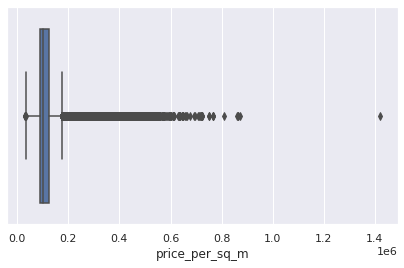

In [133]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(sell_df_cleaned['price_per_sq_m'])

<AxesSubplot:xlabel='house_price_sqm_median'>

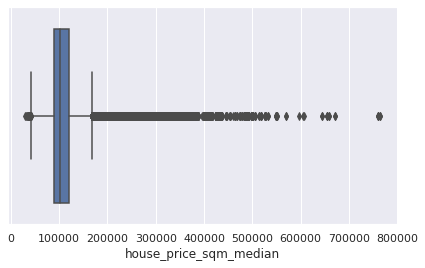

In [134]:
sns.set(rc={'figure.figsize':(7,4)})
sns.boxplot(sell_df_cleaned['house_price_sqm_median'])

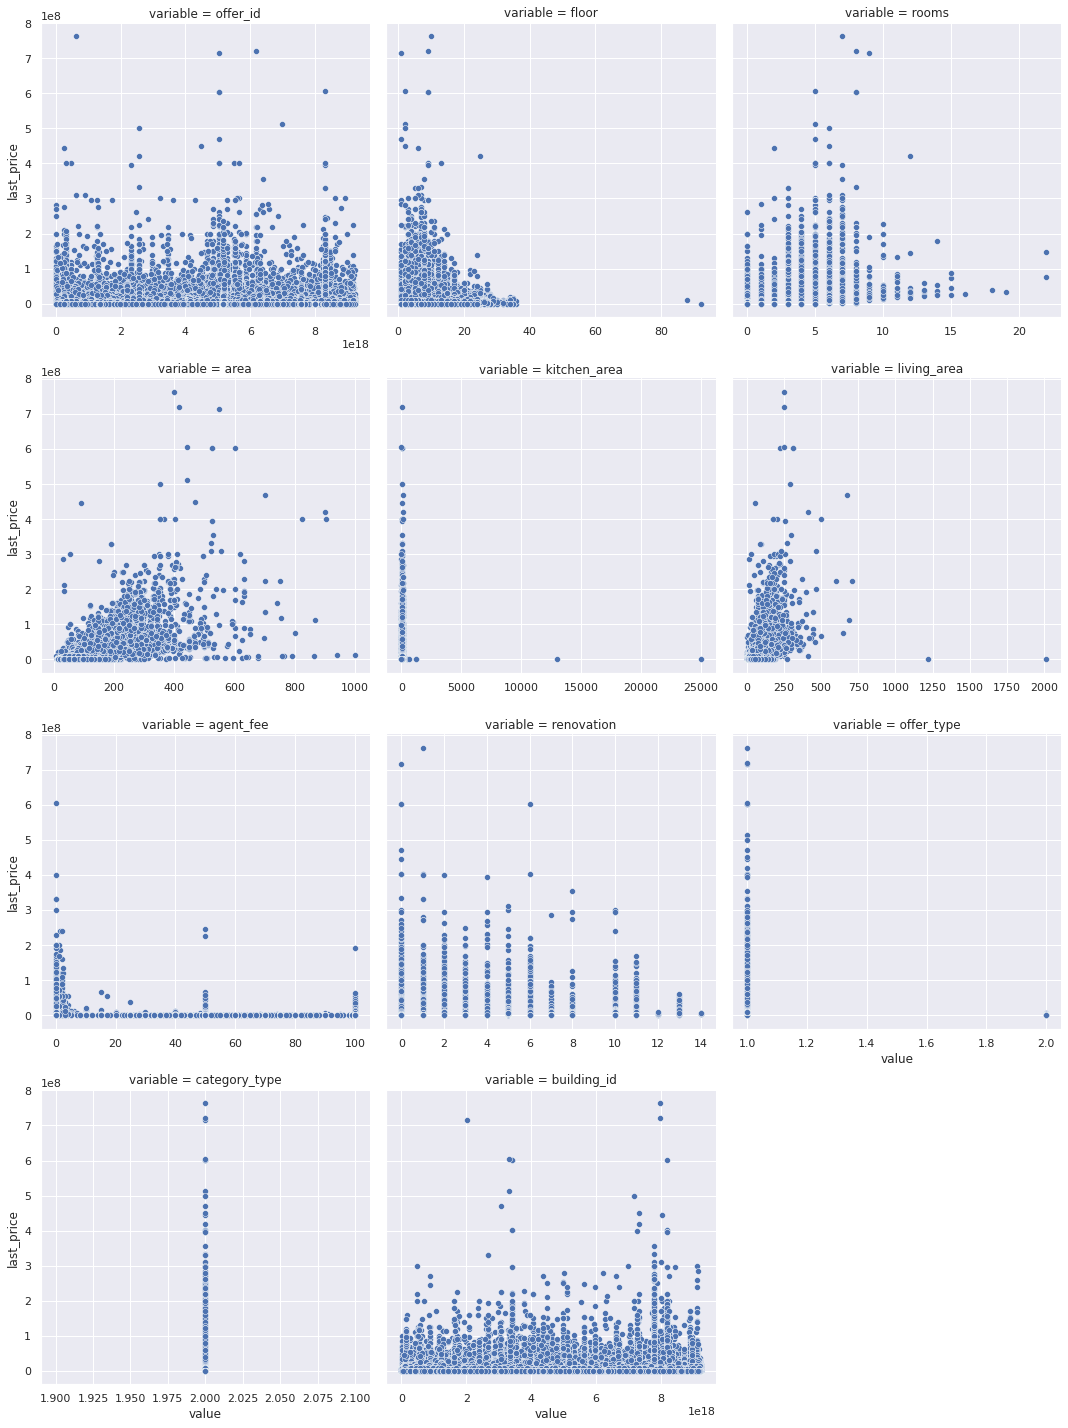

In [222]:
sns.relplot(data=spb_df.select_dtypes('number').melt(id_vars=['last_price']),            x='value', y='last_price', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)           )

## 3 QUESTION

In [137]:
rent_df_cleaned.nlargest(5, 'house_price_sqm_median')

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
144197,5133922772816617217,2017-08-08T00:00:00+03:00,2017-09-21T00:00:00+03:00,500000.0,1,False,4,False,160.0,45.0,61.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3125.000000,3636.363636
144199,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
144200,1667327448230875136,2018-07-14T00:00:00+03:00,2018-08-05T00:00:00+03:00,300000.0,3,False,3,False,150.0,40.0,57.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,2000.000000,3636.363636
144201,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636
140876,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [138]:
sell_df_cleaned.nlargest(5, 'house_price_sqm_median')

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
154921,1443304022455782144,2016-06-16T00:00:00+03:00,2016-08-03T00:00:00+03:00,7900000.0,4,False,3,False,72.0,9.0,51.0,0.0,11.0,1,2,"Россия, Санкт-Петербург, Бронницкая улица, 27",5973191840232289745,1.097222e+05,764861.111111
154922,4108699179660617729,2018-04-25T00:00:00+03:00,2018-07-24T00:00:00+03:00,21300000.0,2,False,0,True,15.0,10.2,12.0,0.0,11.0,1,2,"Россия, Санкт-Петербург, Бронницкая улица, 27",5973191840232289745,1.420000e+06,764861.111111
185781,6177036172729933056,2017-09-15T00:00:00+03:00,2018-02-06T00:00:00+03:00,95000000.0,1,False,3,False,131.7,10.2,31.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,7.213364e+05,759301.442673
185783,2546181578698225920,2018-03-01T00:00:00+03:00,2018-05-15T00:00:00+03:00,45000000.0,1,False,3,False,131.7,10.2,31.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,3.416856e+05,759301.442673
185784,3973191269578770688,2018-03-23T00:00:00+03:00,2018-08-20T00:00:00+03:00,60000000.0,1,False,3,False,131.0,10.2,31.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,4.580153e+05,759301.442673


## 4 QUESTION

In [139]:
rent_df_cleaned.nlargest(5, 'last_price')

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
92007,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
91375,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
91991,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
144199,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
144201,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [140]:
sell_df_cleaned.nlargest(5, 'last_price')

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
89888,4047291,2015-09-25T00:00:00+03:00,2016-02-12T00:00:00+03:00,99900000.0,2,False,3,False,152.0,10.2,102.0,0.0,10.0,1,2,"Россия, Санкт-Петербург, набережная Мартынова, 62",4378677413263079878,657236.842105,506417.112299
79874,474815048196806590,2016-06-28T00:00:00+03:00,2017-12-28T00:00:00+03:00,99800000.0,4,False,4,False,211.0,35.0,164.2,0.0,2.0,1,2,"Россия, Санкт-Петербург, Крестовский проспект, 15",1715771589821487796,472985.781991,313807.531381
89896,8867546513508576558,2018-06-05T00:00:00+03:00,2018-08-20T00:00:00+03:00,99800000.0,1,False,2,False,139.7,66.2,36.6,0.0,1.0,1,2,"Россия, Санкт-Петербург, набережная Мартынова, 62",4378677413263079878,714387.974230,506417.112299
64477,4842857800038025232,2016-02-22T00:00:00+03:00,2018-08-20T00:00:00+03:00,99300000.0,4,False,6,False,253.0,13.3,191.7,0.0,2.0,1,2,"Россия, Санкт-Петербург, Захарьевская улица, 9",8395049726808165242,392490.118577,127564.102564
25231,8310251211171000753,2017-07-10T00:00:00+03:00,2018-08-20T00:00:00+03:00,99000000.0,3,False,4,False,187.5,60.0,68.2,0.0,1.0,1,2,"Россия, Санкт-Петербург, набережная Мартынова, 74",4378677413263079911,528000.000000,526035.650624


## 5 QUESTION

### Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [141]:
total_df_spb = sell_df_cleaned.merge(rent_df_cleaned)
total_df_spb.shape

(0, 19)

In [144]:
total_df_spb = pd.concat([sell_df_cleaned, rent_df_cleaned], axis=0)
total_df_spb.shape

(350330, 19)

In [145]:
total_df_spb.head(1)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,0.0,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074


In [146]:
total_df_spb.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,3.503300e+05,3.503300e+05,350330.000000,350330.000000,350330.000000,313204.000000,317871.000000,317696.000000,297438.000000,350330.000000,350330.0,3.503300e+05,3.503300e+05,350330.000000
mean,4.822237e+18,4.240116e+06,6.715360,1.837213,59.172614,11.583622,33.436969,28.726610,3.276054,1.444980,2.0,4.586879e+18,6.248304e+04,61696.081074
std,2.699242e+18,6.930509e+06,5.181808,1.044483,31.184530,50.781080,19.715425,39.712539,3.831975,0.496964,0.0,2.717007e+18,6.513434e+04,62851.819345
min,7.797270e+05,9.990000e+03,1.000000,0.000000,10.000000,1.040000,1.640000,0.000000,0.000000,1.000000,2.0,4.585730e+14,1.549296e+02,183.098592
25%,2.599987e+18,2.700000e+04,3.000000,1.000000,39.000000,8.000000,19.000000,0.000000,0.000000,1.000000,2.0,2.164656e+18,5.789474e+02,569.805195
50%,5.152293e+18,3.150000e+06,5.000000,2.000000,50.000000,10.200000,30.200000,0.000000,2.000000,1.000000,2.0,4.727029e+18,7.567568e+04,78630.792628
75%,7.127294e+18,5.700000e+06,9.000000,2.000000,70.000000,12.620000,40.000000,50.000000,5.000000,2.000000,2.0,6.865523e+18,1.053571e+05,104456.476156
max,9.223371e+18,9.990000e+07,92.000000,16.000000,340.000000,25000.000000,2015.000000,100.000000,14.000000,2.000000,2.0,9.220297e+18,1.420000e+06,764861.111111


In [166]:
import tqdm

In [215]:
temp = sell_df_cleaned['building_id']
unique_building_sell = pd.unique(temp)
unique_building_sell = pd.DataFrame(data=unique_building_sell, columns=['building_id'])
unique_building_sell['months_sq_m'] = np.nan
unique_building_sell['months_price'] = np.nan
unique_building_sell.head(1)

,building_id,months_sq_m,months_price
0,3552413344225333068,NaN,NaN


In [169]:
unique_building_sell_list = unique_building_sell.values.tolist()

In [216]:
k = -1
for i in unique_building_sell_list:
    k +=1
    temp = total_df_spb[(total_df_spb['building_id']==i[0]) & (total_df_spb['offer_type']==1)]['price_per_sq_m'].median()/total_df_spb[(total_df_spb['building_id']==i[0]) & (total_df_spb['offer_type']==2)]['price_per_sq_m'].median()
    temp1 = total_df_spb[(total_df_spb['building_id']==i[0]) & (total_df_spb['offer_type']==1)]['last_price'].median()/total_df_spb[(total_df_spb['building_id']==i[0]) & (total_df_spb['offer_type']==2)]['last_price'].median()
    unique_building_sell.at[k, 'months_sq_m'] =  temp
    unique_building_sell.at[k, 'months_price'] =  temp1

In [217]:
unique_building_sell.head(1)

,building_id,months_sq_m,months_price
0,3552413344225333068,174.550939,171.212121


In [218]:
unique_building_sell.nsmallest(10, 'months_sq_m')

,building_id,months_sq_m,months_price
20396,441906427059019337,52.295918,234.285714
13681,6216945929824351312,53.080092,329.000000
10112,4873056317681536391,55.638773,364.583333
16001,733773556320921673,55.687500,247.500000
14176,6976487065451391863,57.416268,78.214286
18188,441906427059019305,57.511521,686.274510
6456,7246731949853653472,57.895933,88.814815
1333,8810747501928407960,59.308144,56.562500
12331,4901520549922120825,59.653828,41.249988
14464,7955965937352638970,60.886390,131.500000


In [219]:
unique_building_sell.nsmallest(10, 'months_price')

,building_id,months_sq_m,months_price
22241,3967985793187418353,116.601307,14.866667
10197,1627973416240229632,75.716584,24.210526
12895,5553660887271054733,130.793651,33.571429
20199,815795893180413008,264.547945,34.080000
21921,3673956658633628256,102.500000,34.166667
22265,441654007617554222,146.461538,34.461538
19195,4965573916894568915,114.120370,36.250000
16245,6249504899170877969,77.212794,39.407143
12331,4901520549922120825,59.653828,41.249988
22665,8984082896400418913,216.666667,41.600000
